<a href="https://colab.research.google.com/github/ryrahman-arch/NGG_6050/blob/main/Rahman_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# get our toolboxes
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

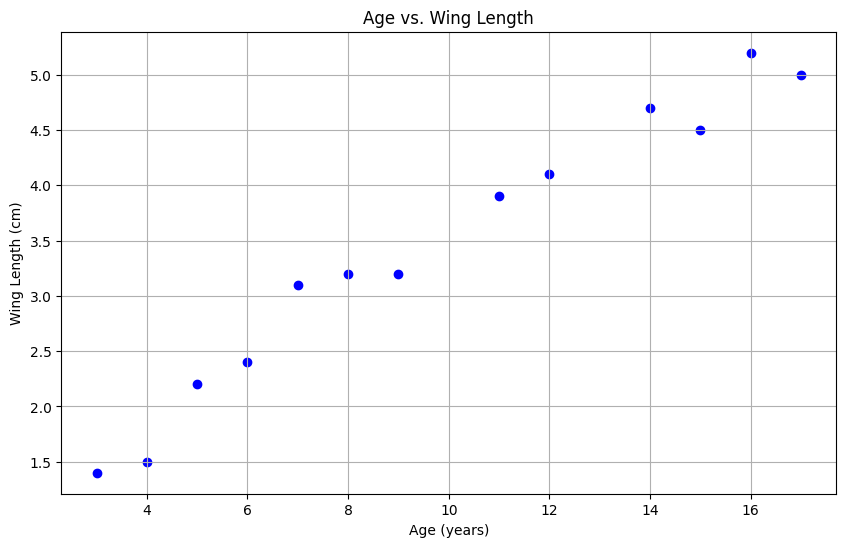

In [10]:
# plotting the relationship between age and wing length
# data
age = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17])
wing_length = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])

# create scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(age, wing_length, color='blue', marker='o')

# add titles and labels
plt.title('Age vs. Wing Length')
plt.xlabel('Age (years)')
plt.ylabel('Wing Length (cm)')
plt.grid(True)

# show the plot
plt.show()


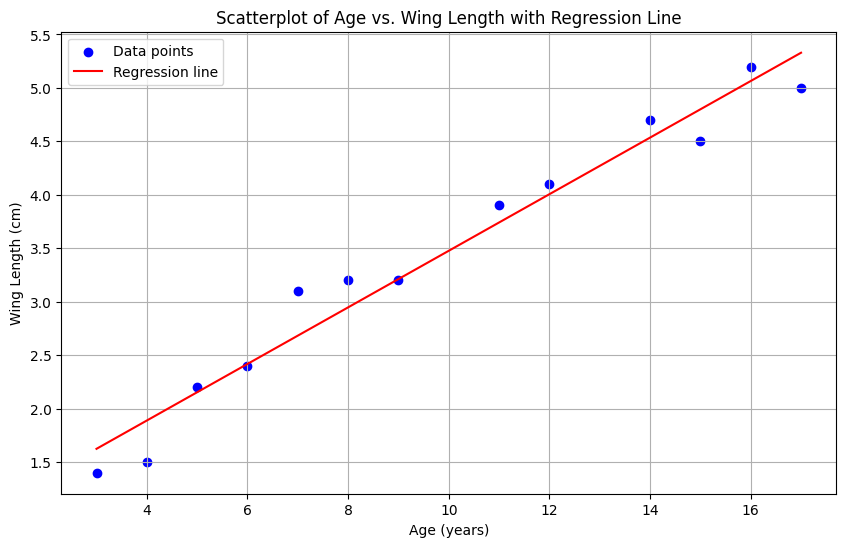

In [11]:
# Create scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(age, wing_length, color='blue', marker='o', label='Data points')

# Perform linear regression
slope, intercept = np.polyfit(age, wing_length, 1)
regression_line = slope * age + intercept

# Plot the regression line
plt.plot(age, regression_line, color='red', label='Regression line')

# Add titles and labels
plt.title('Scatterplot of Age vs. Wing Length with Regression Line')
plt.xlabel('Age (years)')
plt.ylabel('Wing Length (cm)')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

In [18]:
# Calculate p value or chance that null hypothesis is true
# Fit the linear regression
slope, intercept = np.polyfit(age, wing_length, 1)
predicted = slope * age + intercept

# Total sum of squares (SST)
mean_wing_length = np.mean(wing_length)
sst = np.sum((wing_length - mean_wing_length) ** 2)

# Regression sum of squares (SSR)
ssr = np.sum((predicted - mean_wing_length) ** 2)

# Residual sum of squares (SSE)
sse = np.sum((wing_length - predicted) ** 2)

# Degrees of freedom
n = len(age)  # Number of observations
df_regression = 1  # Number of predictors
df_residual = n - df_regression - 1  # Residual degrees of freedom

# Mean squares
msr = ssr / df_regression
mse = sse / df_residual

# F-statistic
f_statistic = msr / mse

# p-value
p_value = 1 - stats.f.cdf(f_statistic, df_regression, df_residual)

# Output results
print(f"F-statistic: {f_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

F-statistic: 289.4008
p-value: 0.0000


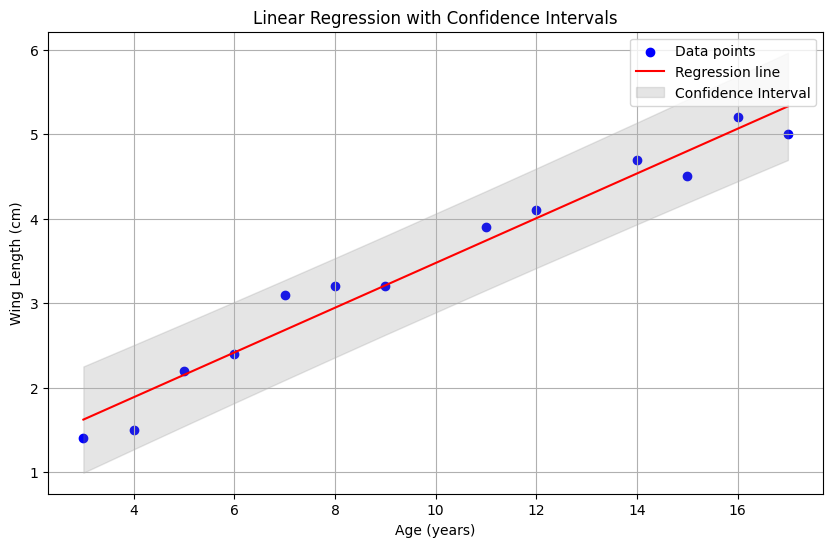

In [20]:
# adding confidence intervals
# Fit the linear regression model
X = sm.add_constant(age)  # Adds a constant term to the predictor
model = sm.OLS(wing_length, X).fit()

# Get predictions and confidence intervals
predictions = model.get_prediction(X)
summary_frame = predictions.summary_frame(alpha=0.05)  # 95% CI

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(age, wing_length, color='blue', marker='o', label='Data points')
plt.plot(age, summary_frame['mean'], color='red', label='Regression line')

# Plotting the confidence intervals
plt.fill_between(age, summary_frame['obs_ci_lower'], summary_frame['obs_ci_upper'],
                 color='gray', alpha=0.2, label='Confidence Interval')

# Add titles and labels
plt.title('Linear Regression with Confidence Intervals')
plt.xlabel('Age (years)')
plt.ylabel('Wing Length (cm)')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

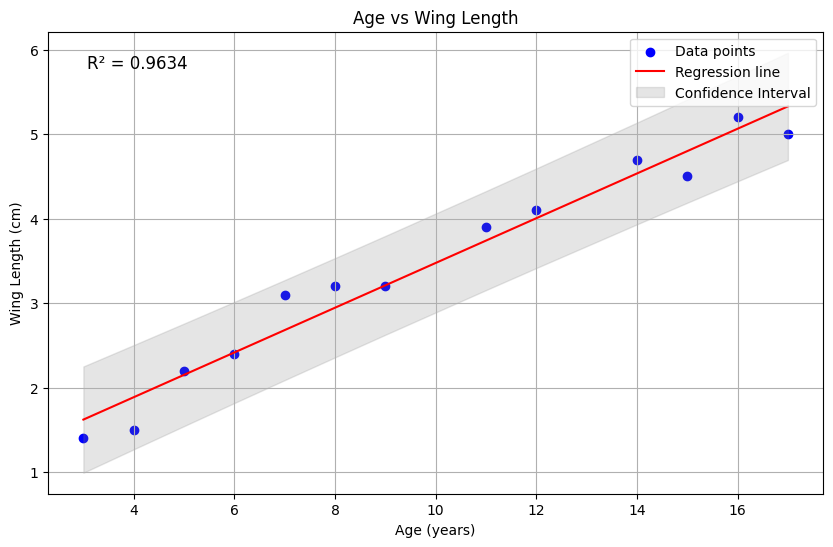

In [22]:
# adding r2 value
# Fit the linear regression model
X = sm.add_constant(age)  # Adds a constant term to the predictor
model = sm.OLS(wing_length, X).fit()

# Get predictions and confidence intervals
predictions = model.get_prediction(X)
summary_frame = predictions.summary_frame(alpha=0.05)  # 95% CI

# R² value
r_squared = model.rsquared

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(age, wing_length, color='blue', marker='o', label='Data points')
plt.plot(age, summary_frame['mean'], color='red', label='Regression line')

# Plotting the confidence intervals
plt.fill_between(age, summary_frame['obs_ci_lower'], summary_frame['obs_ci_upper'],
                 color='gray', alpha=0.2, label='Confidence Interval')

# Add R² value to the plot
plt.text(0.05, 0.95, f'R² = {r_squared:.4f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top')

# Add titles and labels
plt.title('Age vs Wing Length')
plt.xlabel('Age (years)')
plt.ylabel('Wing Length (cm)')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


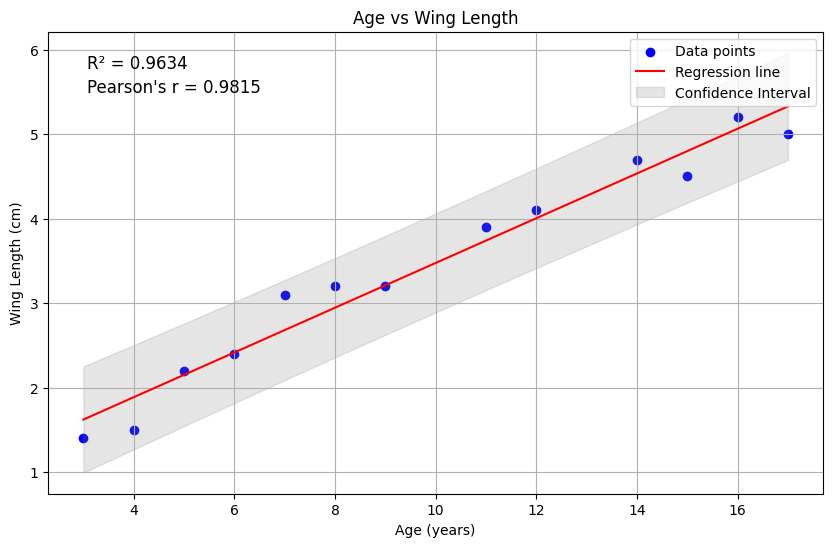

In [41]:
from scipy.stats import pearsonr

# adding Pearson's r
# Fit the linear regression model
X = sm.add_constant(age)  # Adds a constant term to the predictor
model = sm.OLS(wing_length, X).fit()

# Get predictions and confidence intervals
predictions = model.get_prediction(X)
summary_frame = predictions.summary_frame(alpha=0.05)  # 95% CI

# R² value
r_squared = model.rsquared

# Pearson's r
pearson_corr, _ = pearsonr(age, wing_length)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(age, wing_length, color='blue', marker='o', label='Data points')
plt.plot(age, summary_frame['mean'], color='red', label='Regression line')

# Plotting the confidence intervals
plt.fill_between(age, summary_frame['obs_ci_lower'], summary_frame['obs_ci_upper'],
                 color='gray', alpha=0.2, label='Confidence Interval')

# Add R² and Pearson's r values to the plot
plt.text(0.05, 0.95, f'R² = {r_squared:.4f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top')
plt.text(0.05, 0.90, f'Pearson\'s r = {pearson_corr:.4f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top')

# Add titles and labels
plt.title('Age vs Wing Length')
plt.xlabel('Age (years)')
plt.ylabel('Wing Length (cm)')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


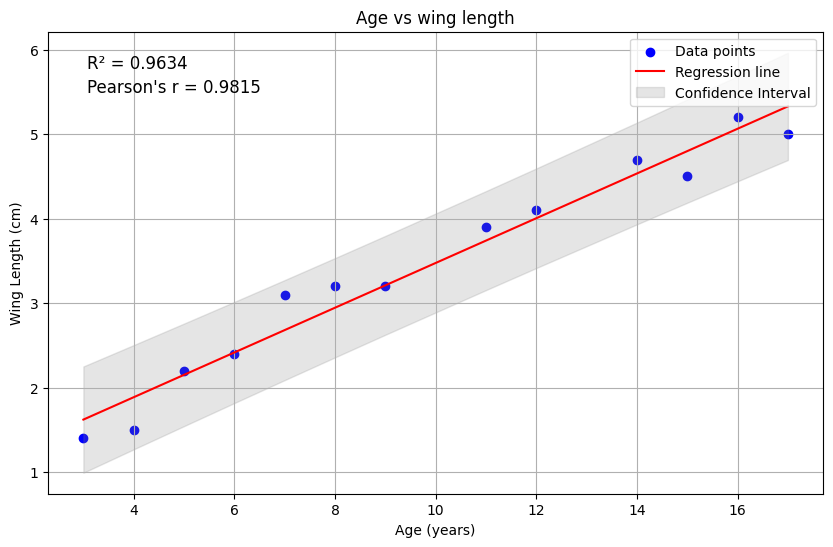

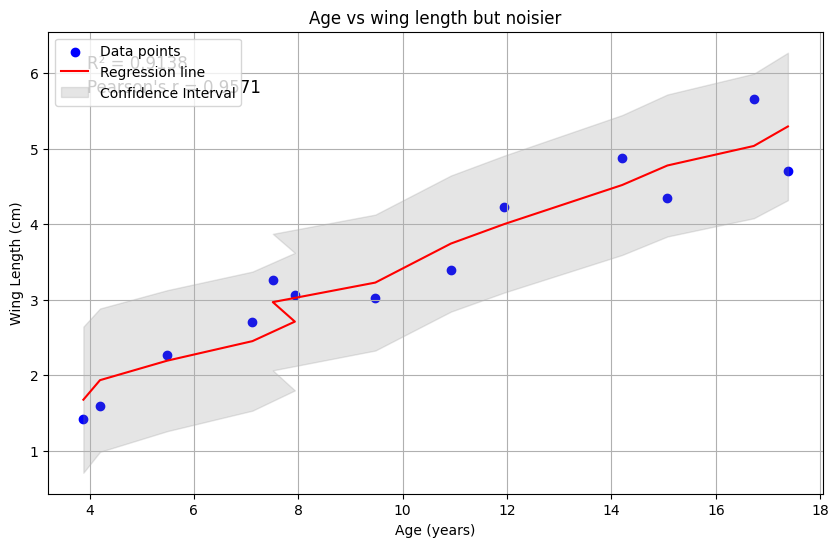

In [43]:
# Adding noise
np.random.seed(0)  # For reproducibility
age_noise = np.random.normal(0, 0.5, size=age.shape)  # Small noise for age
wing_length_noise = np.random.normal(0, 0.2, size=wing_length.shape)  # Small noise for wing length

# Noisy data
age_noisy = age + age_noise
wing_length_noisy = wing_length + wing_length_noise

# Fit the linear regression model
X_noisy = sm.add_constant(age_noisy)  # Adds a constant term to the predictor
model_noisy = sm.OLS(wing_length_noisy, X).fit()

# Get predictions and confidence intervals
predictions_noisy = model_noisy.get_prediction(X)
summary_frame_noisy = predictions_noisy.summary_frame(alpha=0.05)  # 95% CI

# R² value
r_squared_noisy = model_noisy.rsquared

# Pearson's r
pearson_corr_noisy, _ = pearsonr(age_noisy, wing_length_noisy)

# Plotting non-noisy
plt.figure(figsize=(10, 6))
plt.scatter(age, wing_length, color='blue', marker='o', label='Data points')
plt.plot(age, summary_frame['mean'], color='red', label='Regression line')

# Plotting the confidence intervals
plt.fill_between(age, summary_frame['obs_ci_lower'], summary_frame['obs_ci_upper'],
                 color='gray', alpha=0.2, label='Confidence Interval')

# Add R² and Pearson's r values to the plot
plt.text(0.05, 0.95, f'R² = {r_squared:.4f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top')
plt.text(0.05, 0.90, f'Pearson\'s r = {pearson_corr:.4f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top')

# Add titles and labels
plt.title('Age vs wing length')
plt.xlabel('Age (years)')
plt.ylabel('Wing Length (cm)')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

# Plotting noisy
plt.figure(figsize=(10, 6))
plt.scatter(age_noisy, wing_length_noisy, color='blue', marker='o', label='Data points')
plt.plot(age_noisy, summary_frame_noisy['mean'], color='red', label='Regression line')

# Plotting the confidence intervals
plt.fill_between(age_noisy, summary_frame_noisy['obs_ci_lower'], summary_frame_noisy['obs_ci_upper'],
                 color='gray', alpha=0.2, label='Confidence Interval')

# Add R² and Pearson's r values to the plot
plt.text(0.05, 0.95, f'R² = {r_squared_noisy:.4f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top')
plt.text(0.05, 0.90, f'Pearson\'s r = {pearson_corr_noisy:.4f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top')

# Add titles and labels
plt.title('Age vs wing length but noisier')
plt.xlabel('Age (years)')
plt.ylabel('Wing Length (cm)')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()
